# Quenching Franction
---------------------------------------

In this notebook, we study the quenching fraction as a function of the stellar mass and the cluster centric radii.

In [6]:
from file_loc import FileLocs

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

# Reading Initial Data

In [8]:
fl = FileLocs()
galaxy_file = fl.gal_fname1
# galaxy_file = '../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1'
cluster_file= fl.cls_fname

In [9]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groups_deCarvalho2017_galaxies_final_flag_johnnyheq_volumeLimited_v1.csv



In [10]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [11]:
cat

Yang,RA,DEC,z,logM200,R200,N200
int64,float64,float64,float64,float64,float64,int64
2,240.5602,16.1113,0.036,15.29,2.01,525
4,247.1149,40.8317,0.03,14.66,1.24,217
5,247.1633,39.4674,0.03,14.81,1.4,277
6,167.6936,28.5374,0.033,14.6,1.18,167
7,351.1194,14.6251,0.042,14.51,1.1,106
8,239.5372,27.3133,0.09,15.1,1.71,183
9,241.5673,18.1483,0.038,14.48,1.08,143
10,223.2712,16.724,0.045,14.22,0.89,106
11,10.4693,-9.3997,0.056,14.96,1.55,156


# Mask Data
---------------------

In [12]:
mask = np.abs(gal0['vlosn'])<3.
mask&= gal0['ssfr']>-20
mask&= gal0['redshift']<0.085

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 28376
fraction: 0.40


In [13]:
gal = gal0[mask].copy()

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [14]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

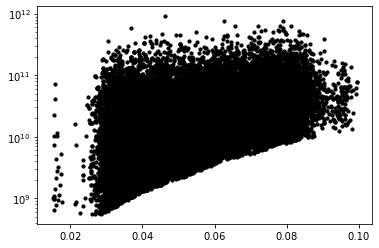

In [15]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

In [16]:
gal

Yang,objid,specobjid,distance,ra,dec,mr_petro,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score,row,redshift,M200,R200,R,Rn,vlos,vlosn,t_infall,infall,orbital,interloper,pinfall,porbital,pinterloper,SF,Pdisk,Pedgeon,PbarGZ2,PbarNair10,Pmerg,Pbulge,Pcigar,TType,PS0
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,1237665371723530461,2476009810579974144,136.414517532881,241.096046201536,18.3265225117837,16.04115,18.25859,16.53461,15.80616,15.45665,15.1811,0.02438663,0.004008314,0.003193695,0.003275148,0.00645624,0.037943,0.014221,0.03623576,9.027653e-06,1.0,5,10.17757,10.07869,10.27127,-1.181167,-2.531329,-0.5418066,-11.39744,-12.72209,-10.7545,19890480000.0,19743920000.0,21502640000.0,11076720000.0,6978492000.0,12026300000.0,0.844974,0,0.036,15.29,2.01,5.859935544032298,2.915390817926517,68.2230404421626,0.033405659266334896,83986280254.96938,0,0,1,0.55,0.0,0.45,0,0.0734078,1.67795e-06,0.230802,0.635232,0.461988,0.894254,0.00218124,0.21357,0.844609
2,1237665371723595947,2476012009603229696,136.367342681583,241.143191969945,18.3148193118128,16.56684,17.88546,16.78333,16.39674,16.14023,15.96136,0.02004988,0.004686815,0.0042966,0.004817891,0.0125057,0.046597,0.009936,0.03605689,8.546705e-06,0.0,1,9.505026,9.440042,9.597365,-0.1663915,-0.3841946,0.1018986,-9.73402,-9.971323,-9.456313,1589293000.0,1054919000.0,1929349000.0,3230117000.0,1780746000.0,4379619000.0,0.8677931,1,0.036,15.29,2.01,5.857909061859396,2.914382617840496,16.462541443649773,0.008060943144137724,347930356637.6765,1,0,0,0.71,0.0,0.29,1,0.097623,0.299171,0.165432,0.380331,0.037185,0.00248825,0.965883,4.13005,0.997373
2,1237665371723726943,2477091735373637632,136.204195492075,241.500714989588,18.1959346410688,14.40143,16.72425,15.12271,14.26843,13.88404,13.59021,0.01797498,0.003051039,0.002401314,0.002479229,0.004752234,0.036194,0.010616,0.03718847,1.854586e-05,0.400819,5,10.79387,10.69631,10.88595,-0.7252186,-2.106907,-0.05099606,-11.5792,-12.95303,-10.87768,14562390000.0,14473980000.0,15976950000.0,13825520000.0,12975890000.0,14975030000.0,0.8468127,3,0.036,15.29,2.01,5.850900775410144,2.9108959081642514,343.9134580687849,0.1683984724646289,16634897919.177307,1,0,0,0.61,0.0,0.39,0,0.995483,0.000529325,0.52153,0.484529,0.470865,0.000103716,0.0322638,5.21621,0.989868
2,1237665428645216628,2475963631091607552,129.870359401985,239.948953810887,18.1955300132629,17.56118,19.02965,17.94633,17.52355,17.29253,17.12676,0.04037053,0.007454132,0.007107222,0.008574725,0.02587234,0.041118,0.021436,0.03186652,5.389447e-06,0.2553504,1,8.965192,8.89559,9.06178,-0.7377419,-0.871875,-0.5406381,-9.753775,-9.919286,-9.551639,1026618000.0,829753300.0,1420347000.0,4879402000.0,3929814000.0,7028471000.0,0.9025209,9,0.036,15.29,2.01,5.578819241086302,2.775531960739454,-1196.1256074264847,-0.5856872432312898,4560496009.971106,1,0,0,0.5,0.0,0.5,1,0.00257769,0.840802,0.0808437,0.293939,0.594099,0.00237444,0.989634,1.52224,0.921552
2,1237665429182284038,2475976275475326976,145.037272208084,240.545854425052,18.5285486193564,16.79562,18.84705,17.39799,16.7096,16.29144,15.96981,0.05365087,0.006617848,0.005441343,0.005560851,0.01516103,0.069944,0.024623,0.04625489,1.064745e-05,0.4348827,1,10.12256,10.03242,10.22095,-0.07135902,-0.3104415,0.2036519,-10.2475,-10.50496,-9.949347,1086585000.0,1086585000.0,1884625000.0,1780746000.0,1780746000.0,3779879000.0,0.9094288,10,0.036,15.29,

# Dynamical Classes
---------------------------------------


In [17]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['sfr'])
ssfr  = np.array(gal['ssfr'])

rn   = np.array(gal['Rn'])
vn   = np.array(gal['vlosn'])

sf   = np.array(gal['SF'])

Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

m200 = np.array(gal['M200'])

In [18]:
m200

array([15.29, 15.29, 15.29, ..., 14.21, 14.21, 14.34])

# Quenching Fraction
---------------------------------------

The Quenched Fraction Excess is defined as:
$$
 QFE_{2-1} = \frac{f_{q,1}-f{q,2}}{1-f_{q,1}} \;,
$$
where $f_{q,1}, f_{q,2}$ is the quiescent fraction in a stellar mass bin in
environment 1 and 2, respectively. A QFE of zero implies there is
no excess of quenched galaxies in one environment compared to the
other. A high QFE means that many of the star-forming galaxies
observed in environment 1 must be quenched in environment 2.
In the extreme case of QFE = 1, all of the galaxies that are starforming 
in environment 1 would be quenched were they to reside in environment 2.
<br> see:https://arxiv.org/pdf/2111.14624.pdf

In [19]:
# def quenching_fraction(p1,p2,quenching):
#     """ Quenching Fraction Exceess
#     We weight the probability of a galaxy
#     residing in the enviroment 1 or 2 by 
#     the probabilities p1,p2.
#     """
#     N1 = p1.size
#     N2 = p2.size
    
#     Nq1 = np.sum(p1*quenching)
#     Nq2 = np.sum(p2*quenching)
    
#     fq1 = Nq1/N1
#     fq2 = Nq2/N2
    
#     qfe = (fq2-fq1)/(1-fq1)
#     return qfe

In [20]:
def compute_fraction(prob,eps=1e-6):
    N1, N2 = np.sum(prob), prob.size
    frac = N1/N2
    frac_err = frac*np.sqrt(1/(N1+eps)+1/(N2+eps))
    return np.array([frac,frac_err])

def quenching_fraction_excess(fq1,fq2):
    dfrac = fq2[0]-fq1[0]
    qfe = dfrac/(1-fq1[0])
    qfe_err = qfe*np.sqrt((np.sqrt(fq2[1]**2+fq1[1]**2)/dfrac)**2 + (fq1[1]/(1-fq1[0]))**2)
    return np.array([qfe,qfe_err])

In [21]:
def make_bins(x,xbins):
    indices = []
    xmd     = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],xbins[1:]):
        w, = np.where((x<=xh)&(x>xl))
        indices.append(w)
    return indices,xmd

In [27]:
## mass bins
#msbins = np.linspace(10.05,12.,11)
msbins = np.arange(9.0,12.25,0.25)
# msbins = np.percentile(mass,np.linspace(0,100,21))

## radii bins
rbins = np.arange(0.,3.25,0.25)

mskeys, mmed = make_bins(mass,msbins)
rkeys, rmed  = make_bins(rn,rbins)

## halo mass bins
mbins = np.linspace(13.75,15.25,11)
mkeys, m2med = make_bins(m200,mbins)

In [28]:
## Quenching Fraction
## i: infall, o: orbital, n: interlopers

rmask = rn<=1.
hmass_mask = (mass>11.)

# rmask2= rn>=1.
# qf_i_mass = np.array([compute_fraction(Pi[idx][rmask2[idx]]*(1-sf[idx][rmask2[idx]])) for idx in mskeys]).T
qf_o_mass = np.array([compute_fraction(Po[idx][rmask[idx]]*(1-sf[idx][rmask[idx]])) for idx in mskeys]).T
qf_i_mass = np.array([compute_fraction(Pi[idx]*(1-sf[idx])) for idx in mskeys]).T
# qf_o_mass = np.array([compute_fraction(Po[idx]*(1-sf[idx])) for idx in mskeys]).T
qf_n_mass = np.array([compute_fraction(Pn[idx]*(1-sf[idx])) for idx in mskeys]).T

qf_i_radii = np.array([compute_fraction(Pi[idx]*(1-sf[idx])) for idx in rkeys]).T
qf_o_radii = np.array([compute_fraction(Po[idx]*(1-sf[idx])) for idx in rkeys]).T
qf_n_radii = np.array([compute_fraction(Pn[idx]*(1-sf[idx])) for idx in rkeys]).T

qf_i_m200 = np.array([compute_fraction(Pi[idx][hmass_mask[idx]]*(1-sf[idx][hmass_mask[idx]])) for idx in mkeys]).T
qf_o_m200 = np.array([compute_fraction(Po[idx][(hmass_mask)[idx]]*(1-sf[idx][(hmass_mask)[idx]])) for idx in mkeys]).T
qf_n_m200 = np.array([compute_fraction(Pn[idx][hmass_mask[idx]]*(1-sf[idx][hmass_mask[idx]])) for idx in mkeys]).T

In [29]:
## Quenching Fraction Excess
qfe_mass1 = quenching_fraction_excess(qf_i_mass,qf_o_mass)
qfe_mass2 = quenching_fraction_excess(qf_n_mass,qf_o_mass)
qfe_mass3 = quenching_fraction_excess(qf_n_mass,qf_i_mass)

qfe_radii1 = quenching_fraction_excess(qf_i_radii,qf_o_radii)
qfe_radii2 = quenching_fraction_excess(qf_n_radii,qf_o_radii)
qfe_radii3 = quenching_fraction_excess(qf_n_radii,qf_i_radii)

qfe_m2001 = quenching_fraction_excess(qf_i_m200,qf_o_m200)
qfe_m2002 = quenching_fraction_excess(qf_n_m200,qf_o_m200)
qfe_m2003 = quenching_fraction_excess(qf_n_m200,qf_i_m200)


In [30]:
qf_o_mass

array([[0.03298851, 0.1706506 , 0.24864542, 0.34682906, 0.41964649,
        0.46839851, 0.48733748, 0.51910513, 0.55683746, 0.64153005,
        0.67803571, 0.748     ],
       [0.0139944 , 0.02194035, 0.02030544, 0.01998118, 0.01889312,
        0.01789421, 0.02024211, 0.02617483, 0.03913611, 0.07585905,
        0.14253872, 0.51137143]])

(-0.02, 1.05)

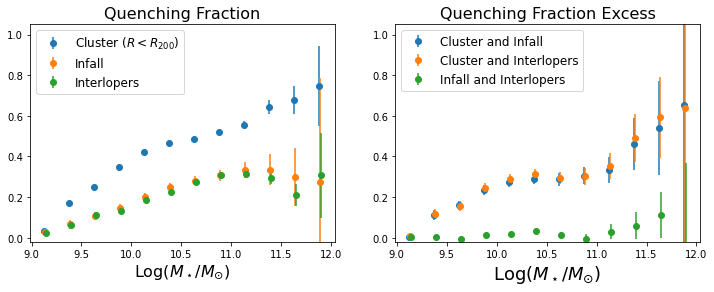

In [31]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.errorbar(mmed,qf_o_mass[0],yerr=qf_i_mass[1],label='Cluster ($R<R_{200}$)',fmt='o')
plt.errorbar(mmed+0.010,qf_i_mass[0],yerr=qf_o_mass[1],label='Infall',fmt='o')
plt.errorbar(mmed+0.020,qf_n_mass[0],yerr=qf_n_mass[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
plt.title('Quenching Fraction',fontsize=16)
plt.ylim(-0.02,1.05)

plt.subplot(1, 2, 2)
plt.errorbar(mmed,qfe_mass1[0],yerr=qfe_mass1[1],label='Cluster and Infall',fmt='o')
plt.errorbar(mmed+0.010,qfe_mass2[0],yerr=qfe_mass2[1],label='Cluster and Interlopers',fmt='o')
plt.errorbar(mmed+0.020,qfe_mass3[0],yerr=qfe_mass3[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
plt.title('Quenching Fraction Excess',fontsize=16)

plt.ylim(-0.02,1.05)

In [32]:
mmed

array([ 9.125,  9.375,  9.625,  9.875, 10.125, 10.375, 10.625, 10.875,
       11.125, 11.375, 11.625, 11.875])

Text(0.5, 1.0, 'Quenching Fraction Excess')

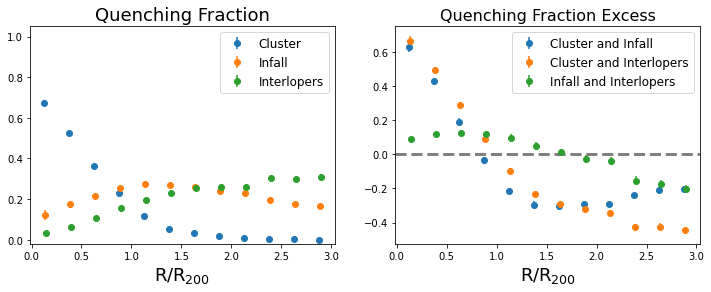

In [33]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)

plt.errorbar(rmed,qf_o_radii[0],yerr=qf_i_radii[1],label='Cluster',fmt='o')
plt.errorbar(rmed+0.010,qf_i_radii[0],yerr=qf_o_radii[1],label='Infall',fmt='o')
plt.errorbar(rmed+0.020,qf_n_radii[0],yerr=qf_n_radii[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12,loc=1)

# plt.axhline(0.4,ls='--',lw=3,color='gray')
plt.xlabel(r'R/R$_{200}$',fontsize=18)
plt.title('Quenching Fraction',fontsize=18)

plt.ylim(-0.02,1.05)

plt.subplot(1, 2, 2)
plt.errorbar(rmed,qfe_radii1[0],yerr=qfe_radii1[1],label='Cluster and Infall',fmt='o')
plt.errorbar(rmed+0.010,qfe_radii2[0],yerr=qfe_radii2[1],label='Cluster and Interlopers',fmt='o')
plt.errorbar(rmed+0.020,qfe_radii3[0],yerr=qfe_radii3[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12)

plt.axhline(0.,ls='--',lw=3,color='gray')
plt.xlabel(r'R/R$_{200}$',fontsize=18)
plt.title('Quenching Fraction Excess',fontsize=16)

# plt.ylim(-0.02,1.05)

In [34]:
### Think more about halo mass
## To Do: quenching fraction per cluster; fit using kllr

Text(0.5, 1.0, 'Quenching Fraction Excess')

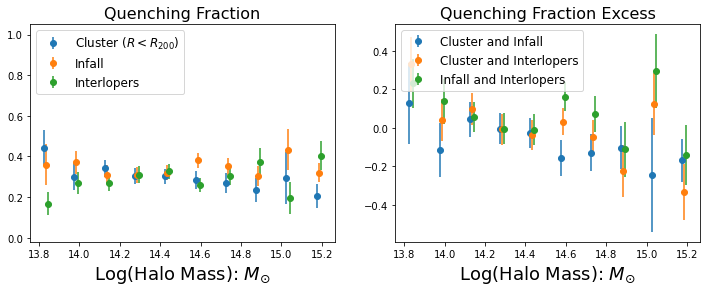

In [35]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.errorbar(m2med,qf_o_m200[0],yerr=qf_i_m200[1],label='Cluster ($R<R_{200}$)',fmt='o')
plt.errorbar(m2med+0.010,qf_i_m200[0],yerr=qf_o_m200[1],label='Infall',fmt='o')
plt.errorbar(m2med+0.020,qf_n_m200[0],yerr=qf_n_m200[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log(Halo Mass): $M_{\odot}$',fontsize=18)
plt.title('Quenching Fraction',fontsize=16)
plt.ylim(-0.02,1.05)

plt.subplot(1, 2, 2)
plt.errorbar(m2med,qfe_m2001[0],yerr=qfe_m2001[1],label='Cluster and Infall',fmt='o')
plt.errorbar(m2med+0.010,qfe_m2002[0],yerr=qfe_m2002[1],label='Cluster and Interlopers',fmt='o')
plt.errorbar(m2med+0.020,qfe_m2003[0],yerr=qfe_m2003[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log(Halo Mass): $M_{\odot}$',fontsize=18)
plt.title('Quenching Fraction Excess',fontsize=16)

# plt.ylim(-0.02,1.05)

### AGNs/Star Forming
------------

Emission line classification based on the BPT diagram using the methodology described in Brinchmann et al (2004). -1 means unclassifiable, 1 is star-forming, 2 means low S/N star-forming, 3 is composite, 4 AGN (excluding liners) and 5 is a low S/N LINER.

In [29]:
bpt_clas = np.array(gal['bpt'])

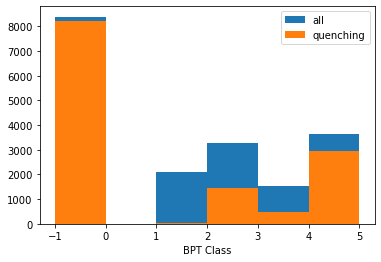

In [30]:
_ = plt.hist(bpt_clas,bins=np.arange(-1,6.,1.),label='all')
_ = plt.hist(bpt_clas,bins=np.arange(-1,6.,1.),weights=(1-sf),label='quenching')
plt.xlabel('BPT Class')
plt.legend()

In [31]:
agn = np.array((bpt_clas==4)).astype(int)
pas = np.array(bpt_clas==-1).astype(int)
com = np.array(bpt_clas==3).astype(int)
sf2 = np.array((bpt_clas==1)|(bpt_clas==2)).astype(int)
liners = np.array((bpt_clas==5)).astype(int)

In [32]:
#agn = agn

In [33]:
rmask = rn<=1.
nrmask = np.logical_not(rmask)
hmass_mask = (mass>11.)

agnf_o_mass = np.array([compute_fraction(Po[idx][rmask[idx]]*(agn)[idx][rmask[idx]]) for idx in mskeys]).T
agnf_i_mass = np.array([compute_fraction(Pi[idx][nrmask[idx]]*(agn)[idx][nrmask[idx]]) for idx in mskeys]).T
# agf_o_mass = np.array([compute_fraction(Po[idx]*(agn[idx])) for idx in mskeys]).T
agnf_n_mass = np.array([compute_fraction(Pn[idx][nrmask[idx]]*(agn)[idx][nrmask[idx]]) for idx in mskeys]).T

agnf_i_radii = np.array([compute_fraction(Pi[idx]*(agn[idx])) for idx in rkeys]).T
agnf_o_radii = np.array([compute_fraction(Po[idx]*(agn[idx])) for idx in rkeys]).T
agnf_n_radii = np.array([compute_fraction(Pn[idx]*(agn[idx])) for idx in rkeys]).T

agnf_i_m200 = np.array([compute_fraction(Pi[idx][hmass_mask[idx]]*(agn[idx][hmass_mask[idx]])) for idx in mkeys]).T
agnf_o_m200 = np.array([compute_fraction(Po[idx][(hmass_mask)[idx]]*(agn[idx][(hmass_mask)[idx]])) for idx in mkeys]).T
agnf_n_m200 = np.array([compute_fraction(Pn[idx][hmass_mask[idx]]*(agn[idx][hmass_mask[idx]])) for idx in mkeys]).T

In [34]:
## Quenching Fraction Excess
agnfe_mass1 = quenching_fraction_excess(agnf_i_mass,agnf_o_mass)
agnfe_mass2 = quenching_fraction_excess(agnf_n_mass,agnf_o_mass)
agnfe_mass3 = quenching_fraction_excess(agnf_n_mass,agnf_i_mass)

agnfe_radii1 = quenching_fraction_excess(agnf_i_radii,agnf_o_radii)
agnfe_radii2 = quenching_fraction_excess(agnf_n_radii,agnf_o_radii)
agnfe_radii3 = quenching_fraction_excess(agnf_n_radii,agnf_i_radii)

agnfe_m2001 = quenching_fraction_excess(agnf_i_m200,agnf_o_m200)
agnfe_m2002 = quenching_fraction_excess(agnf_n_m200,agnf_o_m200)
agnfe_m2003 = quenching_fraction_excess(agnf_n_m200,agnf_i_m200)


<ipython-input-15-e817e24a63e7>:10: RuntimeWarning: invalid value encountered in true_divide
  qfe_err = qfe*np.sqrt((np.sqrt(fq2[1]**2+fq1[1]**2)/dfrac)**2 + (fq1[1]/(1-fq1[0]))**2)


Text(0.5, 1.0, 'AGN Fraction Excess')

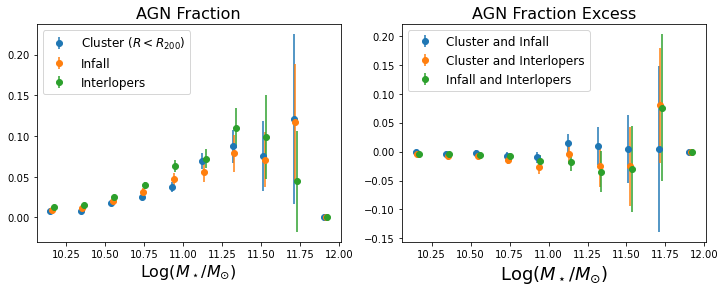

In [35]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.errorbar(mmed,agnf_o_mass[0],yerr=agnf_i_mass[1],label='Cluster ($R<R_{200}$)',fmt='o')
plt.errorbar(mmed+0.010,agnf_i_mass[0],yerr=agnf_o_mass[1],label='Infall',fmt='o')
plt.errorbar(mmed+0.020,agnf_n_mass[0],yerr=agnf_n_mass[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
plt.title('AGN Fraction',fontsize=16)
# plt.ylim(-0.02,0.35)

plt.subplot(1, 2, 2)
plt.errorbar(mmed,agnfe_mass1[0],yerr=agnfe_mass1[1],label='Cluster and Infall',fmt='o')
plt.errorbar(mmed+0.010,agnfe_mass2[0],yerr=agnfe_mass2[1],label='Cluster and Interlopers',fmt='o')
plt.errorbar(mmed+0.020,agnfe_mass3[0],yerr=agnfe_mass3[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
plt.title('AGN Fraction Excess',fontsize=16)

# plt.ylim(-0.02,0.2)

Text(0.5, 1.0, 'AGN Fraction Excess')

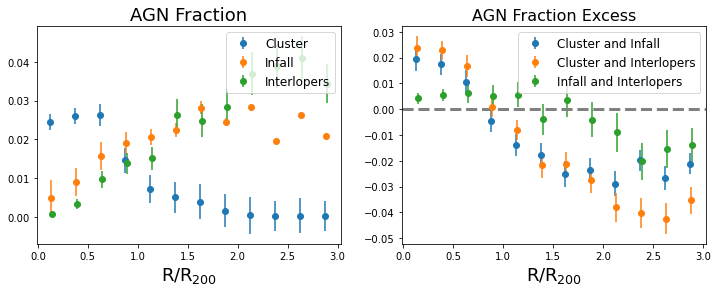

In [36]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)

plt.errorbar(rmed,agnf_o_radii[0],yerr=agnf_i_radii[1],label='Cluster',fmt='o')
plt.errorbar(rmed+0.010,agnf_i_radii[0],yerr=agnf_o_radii[1],label='Infall',fmt='o')
plt.errorbar(rmed+0.020,agnf_n_radii[0],yerr=agnf_n_radii[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12,loc=1)

# plt.axhline(0.4,ls='--',lw=3,color='gray')
plt.xlabel(r'R/R$_{200}$',fontsize=18)
plt.title('AGN Fraction',fontsize=18)
# plt.ylim(-0.02,0.15)

plt.subplot(1, 2, 2)
plt.errorbar(rmed,agnfe_radii1[0],yerr=agnfe_radii1[1],label='Cluster and Infall',fmt='o')
plt.errorbar(rmed+0.010,agnfe_radii2[0],yerr=agnfe_radii2[1],label='Cluster and Interlopers',fmt='o')
plt.errorbar(rmed+0.020,agnfe_radii3[0],yerr=agnfe_radii3[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12)

plt.axhline(0.,ls='--',lw=3,color='gray')
plt.xlabel(r'R/R$_{200}$',fontsize=18)
plt.title('AGN Fraction Excess',fontsize=16)
# plt.ylim(-0.02,0.3)

(-0.2, 0.35)

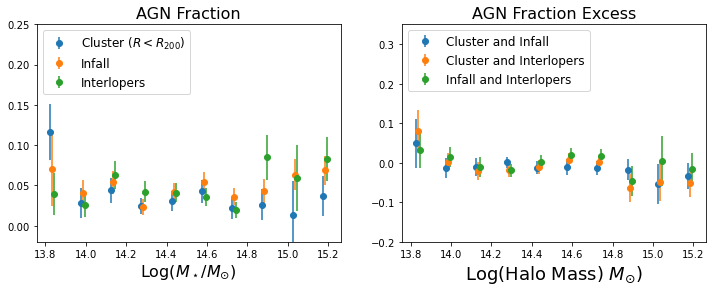

In [37]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.errorbar(m2med,agnf_o_m200[0],yerr=agnf_i_m200[1],label='Cluster ($R<R_{200}$)',fmt='o')
plt.errorbar(m2med+0.010,agnf_i_m200[0],yerr=agnf_o_m200[1],label='Infall',fmt='o')
plt.errorbar(m2med+0.020,agnf_n_m200[0],yerr=agnf_n_m200[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=16)
plt.title('AGN Fraction',fontsize=16)
plt.ylim(-0.02,0.25)

plt.subplot(1, 2, 2)
plt.errorbar(m2med,agnfe_m2001[0],yerr=agnfe_m2001[1],label='Cluster and Infall',fmt='o')
plt.errorbar(m2med+0.010,agnfe_m2002[0],yerr=agnfe_m2002[1],label='Cluster and Interlopers',fmt='o')
plt.errorbar(m2med+0.020,agnfe_m2003[0],yerr=agnfe_m2003[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Log(Halo Mass) $M_{\odot}$)',fontsize=18)
plt.title('AGN Fraction Excess',fontsize=16)

plt.ylim(-0.2,0.35)

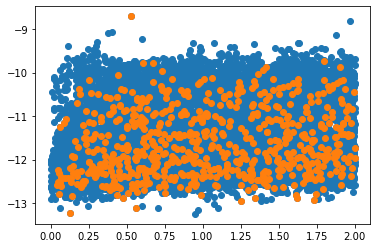

In [218]:
plt.scatter(rn,ssfr)
plt.scatter(rn[(agn).astype(bool)],ssfr[(agn).astype(bool)])



In [239]:
age = np.array(gal['age_fire'])

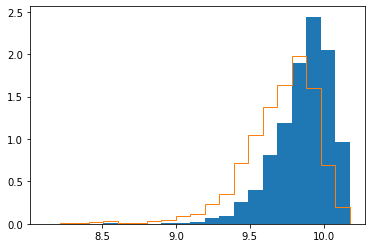

In [245]:
a = plt.hist(np.log10(age),weights=1-sf,bins=21,density=True)
_ = plt.hist(np.log10(age),weights=sf,bins=a[1],histtype='step',density=True)

In [98]:
def stellar_mass_function(m,norm,alpha,mstar):
    x = 10**m/10**mstar
    res = (norm/10**mstar) * (x**alpha) * np.exp(-x)
    return res

def log_stellar_mass_function(m,norm,alpha,mstar):
    return np.log(stellar_mass_function(m,norm,alpha,mstar))

In [109]:
## weighted poisson stats: https://core.ac.uk/download/pdf/207459783.pdf

def get_mass_function_data(mass,nbins=21,weights=None,eps=1e-6):
    #mbins = np.linspace(10.,np.max(mass),21)
    mbins = np.linspace(10.25,11.75,21)
    ncounts, _ = np.histogram(mass,bins=mbins)
    wcounts, _ = np.histogram(mass,bins=mbins,weights=weights)
    
    ## check w/ Arya my definition of weighted Poisson error
    weff = np.mean(weights**2)
    poisson_err = 1/(np.sqrt(ncounts*weff)+eps)
    mean = 0.5*(mbins[1:]+mbins[:-1])
    return mean,wcounts,poisson_err

In [110]:
smf = dict()

smf['orbital'] = get_mass_function_data(mass,nbins=21,weights=Po)
smf['infall'] = get_mass_function_data(mass,nbins=21,weights=Pi)
smf['interlopers']  = get_mass_function_data(mass,nbins=21,weights=Pn)

In [123]:
import scipy.optimize

x,y,yerr = smf['infall']

p0 = np.array([ 5.08547115e+13, -1.,  1.11960295e+01])
popt, pcov = scipy.optimize.curve_fit(
    log_stellar_mass_function, x, np.log(y), 
    bounds=((p0[0]-100,p0[1]-1.,p0[2]-2),\
            (p0[0]+100,p0[1]+1.,p0[2]+2)))

In [124]:
popt

array([ 5.08547115e+13, -5.88355452e-01,  1.10616048e+01])

Text(0.5, 1.0, 'Stellar Mass Function')

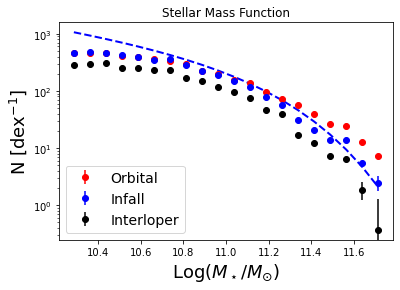

In [125]:
x,y,yerr = smf['orbital']
plt.errorbar(x,y,yerr=yerr,fmt='or',label='Orbital')

x,y,yerr = smf['infall']
plt.errorbar(x,y,yerr=yerr,fmt='ob',label='Infall')

x,y,yerr = smf['interlopers']
plt.errorbar(x,y,yerr=yerr,fmt='ok',label='Interloper')
plt.yscale('log')

plt.legend(fontsize=14)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
plt.ylabel(r'N [dex$^{-1}$]',fontsize=18)


# popt = np.array([ 9.85471153e+12, -7.86930576e-01,  1.16259085e+01])
# popt = np.array([ 5.08547115e+13, -0.9,  1.10616048e+01])
plt.plot(x,stellar_mass_function(x,*popt),'b--',lw=2)
plt.title('Stellar Mass Function')

(0.001, 158.4893192461111)

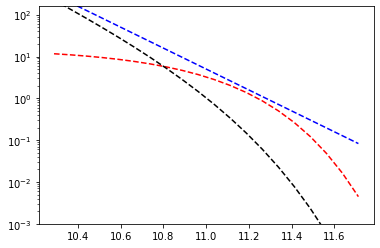

In [126]:
mstar=10.8
alpha=-2.5
norm = 10**12/(10**mstar)

plt.plot(x,norm*(10**x/10**mstar)**alpha,'b--')
plt.plot(x,norm*np.exp(-10**x/10**mstar),'r--')

plt.plot(x,norm*np.exp(-10**x/10**mstar)*(10**x/10**mstar)**alpha,'k--')

plt.yscale('log')
plt.ylim(1e-3,10*norm)

In [27]:
np.min(np.log(y))

-0.020202707316108803

In [28]:
popt

array([ 5.08547115e+13, -2.30595950e-01,  1.11960295e+01])